In [1]:
import numpy as np
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore

import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

train = pd.read_csv("/Users/jyothi/Desktop/santender/train.csv") # the train dataset is now a Pandas DataFrame
test = pd.read_csv("/Users/jyothi/Desktop/santender/test.csv") # the train dataset is now a Pandas DataFrame

In [2]:

print(train.shape)
print(test.shape)

(76020, 371)
(75818, 370)


In [3]:
print(train.drop_duplicates(subset=train.columns[1:-1]).shape)
print(train.drop_duplicates(subset=train.columns[1:]).shape)

print(train.drop_duplicates(subset=train.columns[1:-1], keep=False).shape)
print(train.drop_duplicates(subset=train.columns[1:], keep=False).shape)

(71080, 371)
(71213, 371)
(70120, 371)
(70229, 371)


In [4]:
duplicate_ids = set(train['ID']).difference(set(train.drop_duplicates(subset=train.columns[1:-1], keep=False)['ID']))

In [5]:
duplicate_ids_2 = set(train['ID']).difference(set(train.drop_duplicates(subset=train.columns[1:], keep=False)['ID']))

In [6]:
print(len(duplicate_ids))
print(len(duplicate_ids_2))

5900
5791


In [6]:
to_drop = duplicate_ids.difference(duplicate_ids_2)

In [8]:
len(to_drop)

109

In [7]:
train = train[~train['ID'].isin(to_drop)].drop_duplicates(subset=train.columns[1:])

In [8]:
train.shape

(71104, 371)

In [9]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1
# A little less then 4% are unhappy => unbalanced dataset
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,68365,96.147896
1,2739,3.852104


In [10]:
# Top-10 most common values
train.var3.value_counts()[:10]

 2         69260
 8           138
 9           110
 3           108
-999999      107
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


Looks like -999999 is missing value and var3 is categorical variable

In [11]:
features = train.columns[1:-1]
train.insert(1, 'SumZeros', (train[features] == 0).astype(int).sum(axis=1))
test.insert(1, 'SumZeros', (test[features] == 0).astype(int).sum(axis=1))

## num_var4: number of bank products

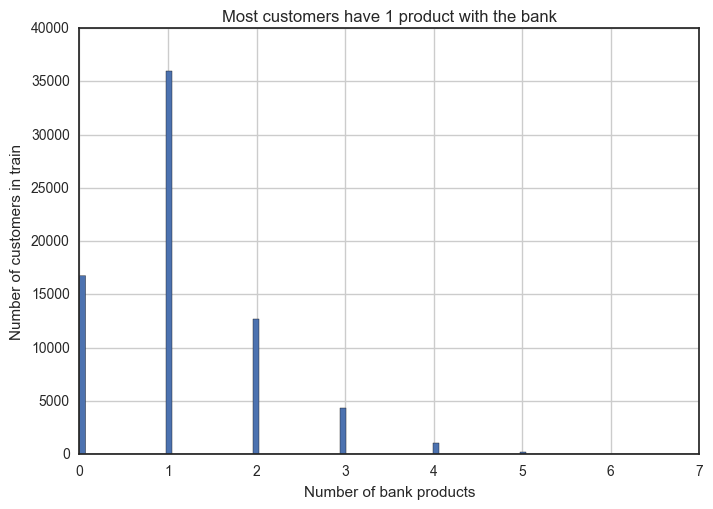

In [12]:
train.num_var4.hist(bins=100)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

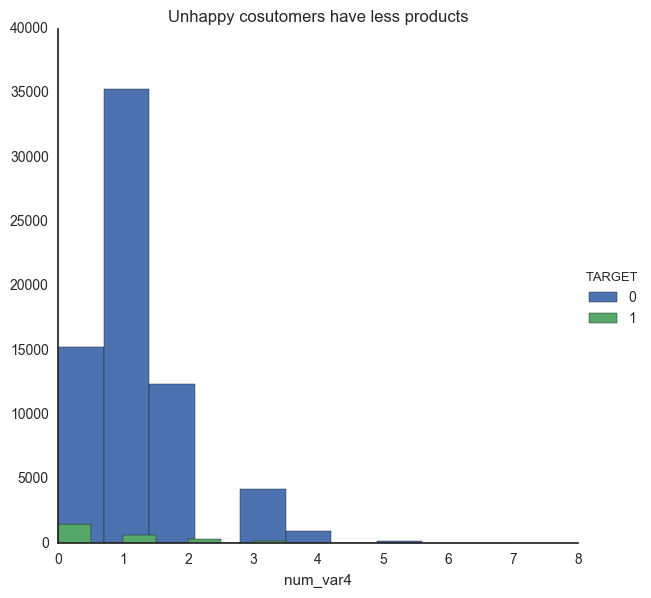

In [13]:

# Let's look at the density of the of happy/unhappy customers in function of the number of bank products
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Unhappy cosutomers have less products')
plt.show()

In [14]:
train[train.TARGET==1].num_var4.hist(bins=6)
plt.title('Amount of unhappy customers in function of the number of products');

### Var 38

In [15]:
train.var38.describe()

count    7.110400e+04
mean     1.171335e+05
std      1.883718e+05
min      5.163750e+03
25%      6.582904e+04
50%      1.000394e+05
75%      1.228889e+05
max      2.203474e+07
Name: var38, dtype: float64

In [16]:

train.loc[train['TARGET']==1, 'var38'].describe()

count    2.739000e+03
mean     9.794244e+04
std      1.112582e+05
min      1.113663e+04
25%      5.512641e+04
50%      8.071455e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

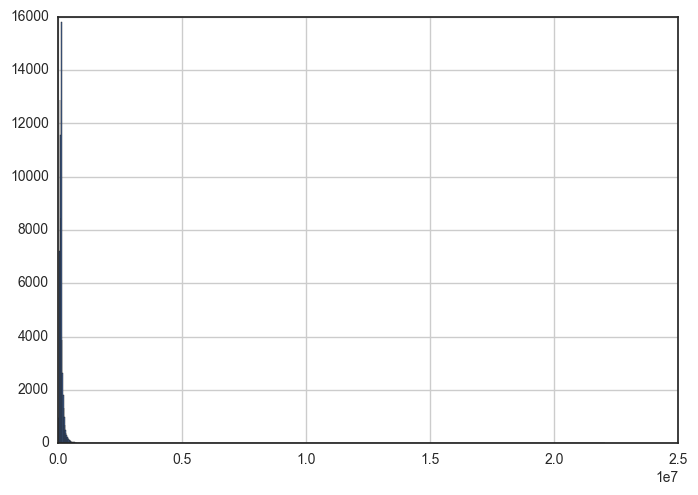

In [23]:
# Histogram for var 38 is not normal distributed
train.var38.hist(bins=1000);

plt.show()

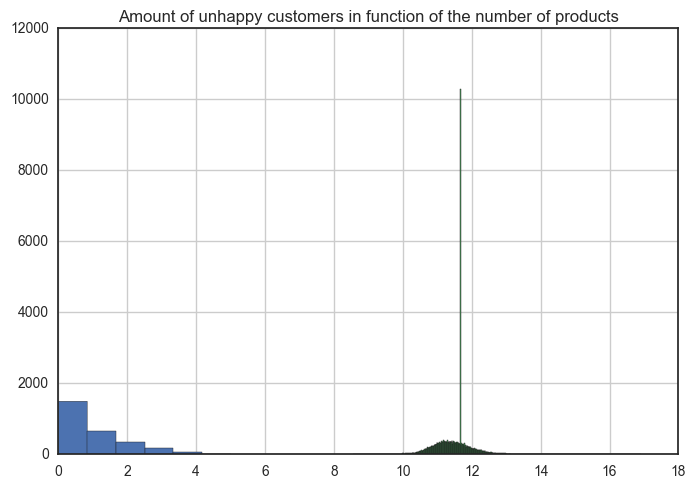

In [17]:
train.var38.map(np.log).hist(bins=1000);
plt.show()

In [25]:

train.var38.value_counts()

117310.979016    10004
451931.220000       16
463625.160000       12
104563.800000       11
288997.440000       10
236690.340000        8
67088.310000         7
329603.970000        7
128318.520000        7
125722.440000        7
104644.410000        7
97639.560000         6
100466.730000        6
168733.620000        6
105260.880000        6
185385.690000        6
235476.720000        5
93037.680000         5
163432.470000        5
83174.280000         5
126065.040000        5
192920.760000        5
121603.020000        5
70813.800000         5
131353.470000        5
185784.720000        5
227397.720000        5
208961.790000        5
53324.460000         5
229351.650000        5
                 ...  
215177.100000        1
215173.560000        1
84167.880000         1
477388.740000        1
215286.420000        1
84177.090000         1
84213.630000         1
84212.790000         1
215283.240000        1
84209.400000         1
83251.440000         1
84207.570000         1
111684.8100

In [18]:

# the most common value is very close to the mean of the other values
train.var38[train['var38'] != 117310.979016494].mean()

117104.42492602245

In [27]:
# what if we exclude the most common value
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()

451931.22    16
463625.16    12
104563.80    11
288997.44    10
236690.34     8
67088.31      7
104644.41     7
125722.44     7
128318.52     7
329603.97     7
168733.62     6
105260.88     6
185385.69     6
100466.73     6
97639.56      6
229351.65     5
208961.79     5
235476.72     5
276030.57     5
53324.46      5
33184.02      5
93037.68      5
121603.02     5
227397.72     5
131353.47     5
83174.28      5
63820.89      5
126065.04     5
71302.53      5
70813.80      5
             ..
52353.12      1
84505.68      1
65688.57      1
84545.04      1
84601.05      1
84555.27      1
23749.89      1
84597.66      1
84592.86      1
84587.01      1
84585.09      1
84583.95      1
215653.56     1
84578.91      1
84577.77      1
84574.05      1
215645.88     1
84571.65      1
84570.66      1
84569.88      1
84567.84      1
84565.59      1
84563.91      1
84562.95      1
84560.67      1
84559.17      1
84558.96      1
84557.91      1
84556.50      1
131072.07     1
Name: var38, dtype: int6

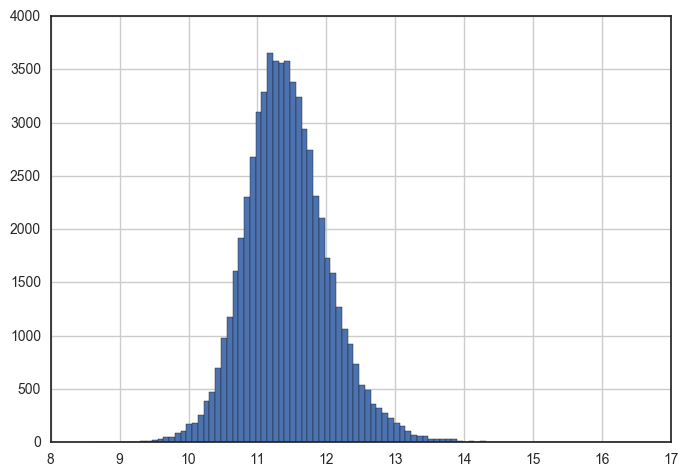

In [19]:
# distribution
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);
plt.show()

In [20]:
# Above plot suggest we split up var38 into two variables
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

test['var38mc'] = np.isclose(test.var38, 117310.979016)
test['logvar38'] = test.loc[~test['var38mc'], 'var38'].map(np.log)
test.loc[test['var38mc'], 'logvar38'] = 0

### var 15 

The most important feature for XGBoost is var15. According to a Kaggle form post var15 is the age of the customer. Let's explore var15

In [21]:
train['var15'].describe()


count    71104.000000
mean        33.553794
std         13.102548
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

In [62]:
train['var15'].value_counts()

23     17935
24      5709
25      3900
26      3082
27      2675
28      2056
31      1739
29      1652
30      1573
32      1520
35      1485
36      1485
34      1427
37      1352
38      1343
33      1329
39      1276
40      1260
41      1197
42      1153
43      1041
44      1011
45       978
46       867
22       850
47       754
48       745
49       680
50       644
51       640
       ...  
15        26
90        25
6         21
21        21
93        20
14        19
11        19
9         18
10        17
92        16
19        16
18        14
17        13
94        12
16        12
13        11
12        10
20         9
8          9
96         7
95         6
7          6
99         6
100        6
102        4
97         3
104        2
98         1
101        1
105        1
Name: var15, dtype: int64

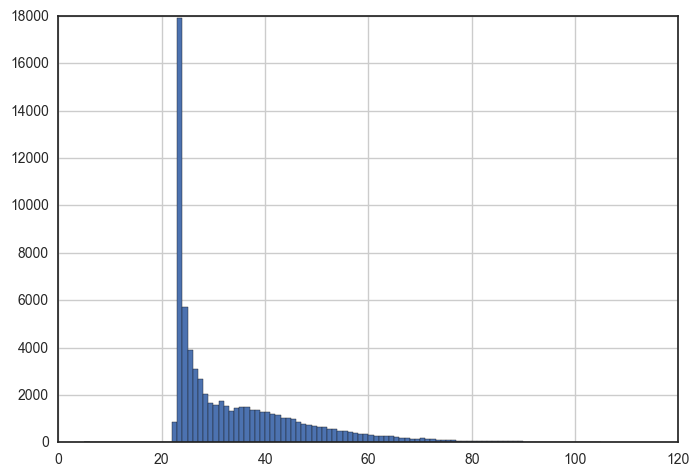

In [22]:
#Looks more normal, plot the histogram
train['var15'].hist(bins=100);
plt.show()

In [55]:

# Let's look at the density of the age of happy/unhappy customers



In [23]:
# improve the plot by making the x axis logarithmic
train['log_saldo_var30'] = train.saldo_var30.map(np.log)
test['log_saldo_var30'] = test.saldo_var30.map(np.log)

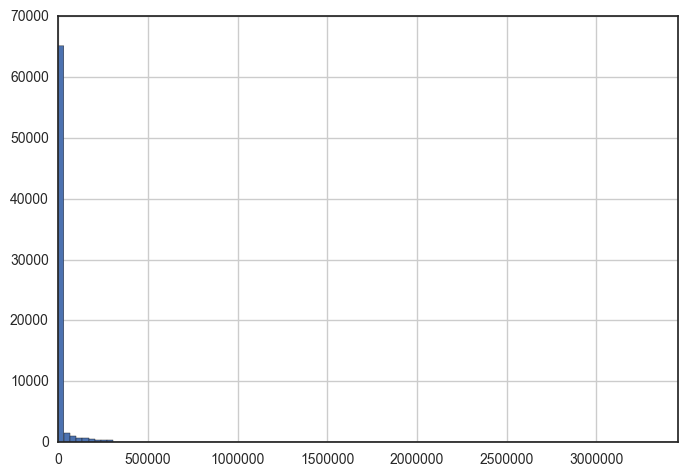

In [24]:
train.saldo_var30.hist(bins=100)
plt.xlim(0, train.saldo_var30.max());
plt.show()

In [25]:
# improve the plot by making the x axis logarithmic
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

y= pd.DataFrame(train['log_saldo_var30'])
y['TARGET'] = train["TARGET"]

In [52]:

# Let's look at the density of the age of happy/unhappy customers for saldo_var30

sns.FacetGrid(train, hue="TARGET") \
   .map(plt.hist,  "var15") \
   .add_legend()




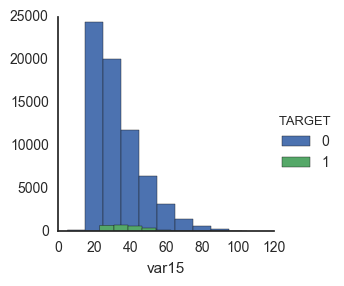

In [53]:
plt.show()

In [57]:
sns.FacetGrid(train[~train.var38mc], hue="TARGET") \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120]);

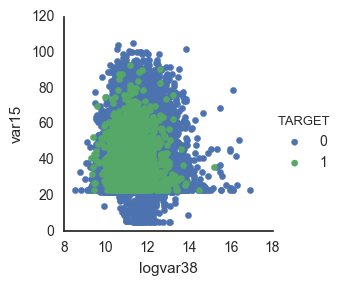

In [58]:
plt.show()

In [59]:
sns.FacetGrid(train, hue="TARGET") \
   .map(plt.hist,  "var38mc") \
   .add_legend()

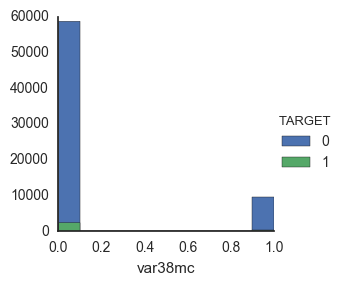

In [60]:
plt.show()

In [61]:
train.var38mc

0        False
1        False
2        False
3        False
4         True
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16        True
17       False
18       False
19       False
20       False
21       False
22        True
23       False
24        True
25       False
26       False
27       False
28       False
29       False
         ...  
75988    False
75989    False
75990    False
75991     True
75992    False
75993    False
75994    False
75995    False
75997    False
75998    False
75999    False
76000     True
76001    False
76002    False
76003    False
76004    False
76005    False
76006     True
76007    False
76008    False
76009    False
76010    False
76011    False
76012     True
76013    False
76014    False
76015    False
76016    False
76017    False
76018    False
Name: var38mc, dtype: bool